In [1]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [75]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk import word_tokenize

from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cvalley\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cvalley\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Import Dataset

In [4]:
movies = pd.read_csv("IMDB_sample.csv")
movies = movies.rename(columns = {"Unnamed: 0": "movie_id"})
movies[:5]

,movie_id,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [5]:
# 1 = Positive, 0 = Negative

movies.label.value_counts().to_frame()

,label
0,3782
1,3719


In [6]:
# Percentage
# 1 = Positive, 0 = Negative

(movies.label.value_counts() / len(movies)).round(3)

0    0.504
1    0.496
Name: label, dtype: float64

In [7]:
# Reviews Length
movies["Length"] = movies["review"].str.len()
movies[:5]

,movie_id,review,label,Length
0,18245,This short spoof can be found on Elite's Mille...,0,667
1,19801,A singularly unfunny musical comedy that artif...,0,2982
2,3222,"An excellent series, masterfully acted and dir...",1,669
3,6010,The master of movie spectacle Cecil B. De Mill...,1,691
4,16355,I was gifted with this movie as it had such a ...,0,1087


In [8]:
# Longest Review
movies[movies["Length"] == movies["Length"].max()]

,movie_id,review,label,Length
4930,49,Titanic directed by James Cameron presents a f...,1,10321


In [9]:
# Shortest Review
movies[movies["Length"] == movies["Length"].min()]

,movie_id,review,label,Length
1628,13568,This movie is terrible but it has some good ef...,0,52


### Sentiment analysis types and approaches

In [10]:
text = "Data Science pays more than Web Development"

In [11]:
my_valence = TextBlob(text)
my_valence.sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [12]:
poem = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'

In [13]:
my_valence = TextBlob(poem)
my_valence.sentiment

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)

**sentiment of movie review**

In [14]:
titanic = movies[movies["Length"] == movies["Length"].max()]
titanic

,movie_id,review,label,Length
4930,49,Titanic directed by James Cameron presents a f...,1,10321


In [15]:
blob_titanic = TextBlob(titanic["review"].values[0])
blob_titanic.sentiment

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)

### Word Cloud

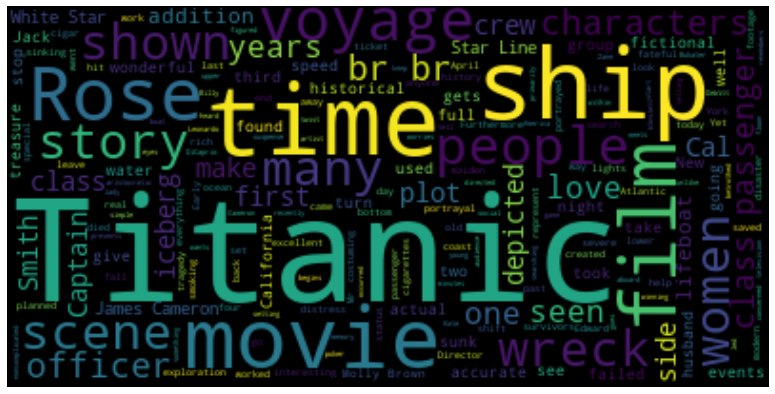

In [16]:
# Generate the word cloud
rw = WordCloud().generate(titanic["review"].values[0])

# Create a figure of the generated cloud
plt.figure(figsize = (18, 7))
plt.imshow(rw, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [17]:
# positive reviews
pr = movies[movies["label"] == 1].sort_values(by = "Length", ascending = False)

# Top 100
pr = pr[:100]

pr[:5]

,movie_id,review,label,Length
4930,49,Titanic directed by James Cameron presents a f...,1,10321
3582,5917,By now you've probably heard a bit about the n...,1,9420
2115,9682,Warning: Does contain spoilers.<br /><br />Ope...,1,8180
1942,10476,I thought that ROTJ was clearly the best out o...,1,7134
6165,346,Jim Carrey is back to much the same role that ...,1,6947


In [18]:
# Join Top 100 reviews in a string
pr_100 = pr["review"].str.cat(sep = ".")

In [19]:
my_stopwords = set(STOPWORDS)
my_stopwords.update(["<br /><br />", "movie", "movies", "film", "films"])

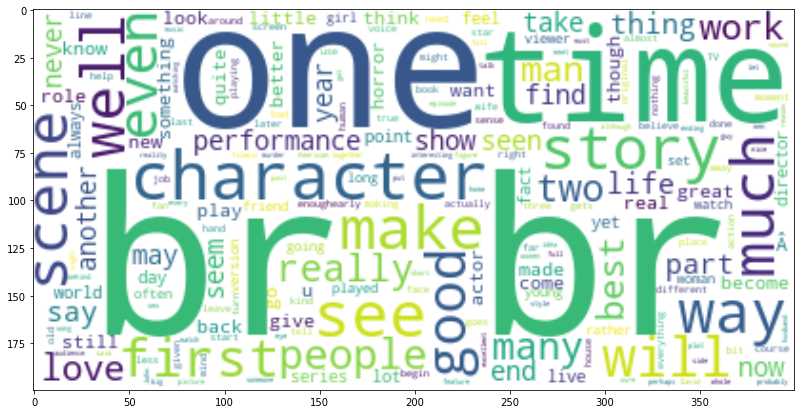

In [20]:
# Word Cloud
plt.figure(figsize =(18, 7))
my_cloud = WordCloud(background_color ='white', stopwords=my_stopwords).generate(pr_100)
plt.imshow(my_cloud, interpolation = 'bilinear')
plt.show()

### Bag of Words

In [21]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

In [22]:
# Object
vect = CountVectorizer()

# Fitting
annak_vec = vect.fit_transform(annak)

# Outout
print(annak_vec.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


### BOW using product reviews

In [23]:
amazon = pd.read_csv("amazon_reviews_sample.csv")
del amazon["Unnamed: 0"]
amazon[:5]

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [24]:
# Build the vectorizer, specify max features
avec = CountVectorizer(max_features = 100)

am_vec = avec.fit_transform(amazon["review"])

# Create the bow representation
X_df = pd.DataFrame(am_vec.toarray(), columns = avec.get_feature_names())

X_df[:5]

,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,2,0,1,0,2,0,1
1,0,0,0,0,0,0,3,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,3,0,0,1,4,0,1,1,...,0,0,1,1,0,0,1,1,2,0
3,0,0,0,0,0,0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,3,1


### Tokenize a string

In [25]:
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

In [26]:
words = len(word_tokenize(GoT))
words

41

### Word tokens from the Amazon Reviews

In [27]:
amazon["Words"] = [len(word_tokenize(review)) for review in amazon["review"]]

In [28]:
amazon.head()

,score,review,Words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


### Word tokens from the Amazon Reviews with Stopworsds

In [29]:
my_stop_words = ENGLISH_STOP_WORDS.union(['film', 'movie', 'cinema', 'theatre'])

vect = CountVectorizer(stop_words = my_stop_words)

bow = vect.fit_transform(amazon["review"])

pd.DataFrame(bow.toarray(), columns = vect.get_feature_names())

,00,000,001,002,00290,007,0070412901,0072316373,008,00now,...,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,ángel,émouvantes,étai,était,étre,éviter,última,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Word Cloud of Tweets

In [47]:
tweets = pd.read_csv("Tweets.csv")
tweets[:4]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)


In [31]:
tweetstop = set(STOPWORDS)
tweetstop.update(["@", "flight"])

In [32]:
all_tweets = tweets["text"].str.cat(sep = ".")

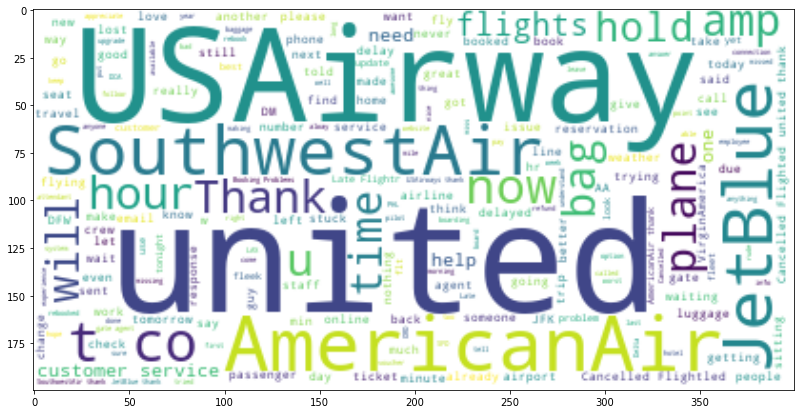

In [33]:
plt.figure(figsize = (18, 7))
my_cloud = WordCloud(background_color = "white", stopwords = tweetstop).generate(all_tweets)

plt.imshow(my_cloud, interpolation = 'bilinear')
plt.show()

### Airline sentiment with stop words

In [34]:
airstop = ENGLISH_STOP_WORDS.union(['@', 'airline', 'airlines', 'flight'])

In [35]:
airvect = CountVectorizer(stop_words = airstop)

bow = airvect.fit_transform(tweets["text"])

pd.DataFrame(bow.toarray(), columns = airvect.get_feature_names())

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Regular Expressions

In [36]:
my_string = '#FlyEmirates'

X = re.search('#\w+', my_string)
print(X)

<re.Match object; span=(0, 12), match='#FlyEmirates'>


### Specify the token pattern

**Remove alphanumeric**

In [37]:
vect = CountVectorizer(token_pattern = r'\b[^\d\W][^\d\W]') 

vp = vect.fit_transform(tweets["text"])
print("length of vectorizers =", len(vect.get_feature_names()))

length of vectorizers = 643


In [38]:
# Build the first vectorizer
vect1 = CountVectorizer()
vect1.fit_transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]')
vect2.fit_transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


### String operators with the Twitter data

In [39]:
word_tokens = [word_tokenize(review) for review in tweets.text]
print("Original Tokens: ", word_tokens[0])

# Filter out non-letter characters
clean_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print("Cleaned Tokens: ", clean_tokens[0])

Original Tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned Tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


### Stems and lemmas from GoT

In [40]:
stemer = PorterStemmer()

lemmatizer = WordNetLemmatizer()

tokens = word_tokenize(GoT)

In [41]:
# Stems

stemmed_tokens = [stemer.stem(token) for token in tokens]
print(stemmed_tokens)

['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [42]:
# Lemmatized

lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print(lemma_tokens)

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


### Stems for tweets

In [43]:
tweets = tweets["text"]

In [44]:
# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(token) for token in tweets]

# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 

# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


### TfidfVectorizer

In [45]:
tfidf = TfidfVectorizer()

annak_tfidf = tfidf.fit_transform(annak)

pd.DataFrame(annak_tfidf.toarray(), columns = tfidf.get_feature_names())

,alike,all,are,every,families,family,happy,in,is,its,own,unhappy,way
0,0.447214,0.447214,0.447214,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.301511,0.000000,0.301511,0.000000,0.301511,0.301511,0.301511,0.301511,0.603023,0.301511


### TfIdf on Twitter Airline Sentiment Data

In [48]:
my_pattern = r'\b[^\d\W][^\d\W]+\b'

vect = TfidfVectorizer(token_pattern = my_pattern,
                       max_features = 100,
                       ngram_range = (1, 2),
                       stop_words = ENGLISH_STOP_WORDS)

vect_t = vect.fit_transform(tweets.text)

pd.DataFrame(vect_t.toarray(), columns = vect.get_feature_names())

,aa,agent,airline,airport,americanair,amp,bag,baggage,bags,cancelled,...,ve,virginamerica,wait,waiting,want,way,weather,work,worst,yes
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.544485,0.531770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.407271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.537247,0.0,0.0,0.0,0.0,...,0.000000,0.559828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.663756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.365307,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.142311,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.290299,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic regression of movie reviews

In [49]:
movie = pd.read_csv("IMDB_sample.csv")
del movie["Unnamed: 0"] 
movie[:5]

,review,label
0,This short spoof can be found on Elite's Mille...,0
1,A singularly unfunny musical comedy that artif...,0
2,"An excellent series, masterfully acted and dir...",1
3,The master of movie spectacle Cecil B. De Mill...,1
4,I was gifted with this movie as it had such a ...,0


In [50]:
my_stopwords = set(STOPWORDS)

In [51]:
cv = CountVectorizer(stop_words = my_stopwords, token_pattern = r'\b[^\d\W][^\d\W]+\b', max_features = 200)

bow = cv.fit_transform(movie["review"])

movie_bow = pd.DataFrame(bow.toarray(), columns = cv.get_feature_names())

In [52]:
df_m = pd.concat([movie_bow, movie["label"]], axis = 1)
df_m[:5]

,acting,action,actor,actors,actually,almost,although,always,american,another,...,woman,work,world,worst,worth,year,years,yet,young,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [53]:
X = df_m.drop("label", axis = 1)
y = df_m["label"]

In [54]:
lr = LogisticRegression()

lr.fit(X, y)

pred = lr.predict(X)

pd.DataFrame({"Actual": y, 
              "Predicted": pred})[::500]

,Actual,Predicted
0,0,0
500,0,0
1000,1,0
1500,1,1
2000,0,0
2500,1,1
3000,0,1
3500,1,1
4000,1,1
4500,0,0


In [55]:
score = accuracy_score(y, pred)
score

0.7934942007732302

### Logistic regression using Twitter data

In [56]:
airline = pd.read_csv("Tweets.csv")
airline[:5]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [57]:
airline_cv = CountVectorizer(stop_words = my_stopwords, token_pattern = r'\b[^\d\W][^\d\W]+\b', max_features = 100)

bow_air = airline_cv.fit_transform(airline["text"])

bow_df = pd.DataFrame(bow_air.toarray(), columns = airline_cv.get_feature_names())
bow_df[:3]

,agent,airline,airport,americanair,amp,another,back,bag,baggage,bags,...,virginamerica,wait,waiting,want,way,weather,will,work,worst,yes
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
airline_sent = pd.concat([bow_df, airline["airline_sentiment"]], axis = 1)
airline_sent[:5]

,agent,airline,airport,americanair,amp,another,back,bag,baggage,bags,...,wait,waiting,want,way,weather,will,work,worst,yes,airline_sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


In [59]:
airline_sent["airline_sentiment"] = airline_sent["airline_sentiment"].astype("category")

In [60]:
X = airline_sent.drop("airline_sentiment", axis = 1)
y = airline_sent["airline_sentiment"]

In [61]:
lr = LogisticRegression()

lr.fit(X, y)

pred = lr.predict(X)

pd.DataFrame({"Actual": y,
              "Predicted": pred})[::500]

,Actual,Predicted
0,neutral,neutral
500,neutral,negative
1000,negative,negative
1500,negative,negative
2000,negative,negative
2500,negative,negative
3000,negative,negative
3500,negative,negative
4000,negative,negative
4500,negative,negative


In [62]:
score_air =  accuracy_score(y, pred)
score_air

0.7294398907103825

### Build and assess a model: movies reviews

In [66]:
mcv = CountVectorizer(stop_words = my_stopwords, token_pattern = r'\b[^\d\W][^\d\W]+\b', max_features = 200)

mcv_bow = mcv.fit_transform(movie["review"])

mcv_bow_df = pd.DataFrame(mcv_bow.toarray(), columns = mcv.get_feature_names())

mcv_bow_df[:5]

,acting,action,actor,actors,actually,almost,although,always,american,another,...,without,woman,work,world,worst,worth,year,years,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,2,0,0,0,0,...,1,0,0,0,0,0,2,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [67]:
df_ml = pd.concat([mcv_bow_df, movie["label"]], axis = 1)
df_ml[:5]

,acting,action,actor,actors,actually,almost,although,always,american,another,...,woman,work,world,worst,worth,year,years,yet,young,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [69]:
df_ml["label"] = df_ml["label"].astype("category")

In [70]:
X = df_ml.drop("label", axis = 1)
y = df_ml["label"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

In [73]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

lpred = logreg.predict(X_test)

pd.DataFrame({"Actual":y_test,
              "Predicted": lpred})[::500]

,Actual,Predicted
5612,0,1
1792,1,1
6929,1,1
5304,1,1


In [74]:
lrsc = accuracy_score(y_test, lpred)
lrsc

0.7661558960692871

In [78]:
confusion_matrix(y_test, lpred)

array([[567, 190],
       [161, 583]], dtype=int64)

In [85]:
(confusion_matrix(y_test, lpred)/len(y_test)).round(2)

array([[0.38, 0.13],
       [0.11, 0.39]])

### Build and assess a model: product reviews data

In [93]:
my_stopwords = set(STOPWORDS)

In [94]:
amz_r = CountVectorizer(max_features = 200, stop_words = my_stopwords, token_pattern = r'\b[^\d\W][^\d\W]+\b')

amzr_bow = amz_r.fit_transform(amazon["review"])

ab_df = pd.DataFrame(amzr_bow.toarray(), columns = amz_r.get_feature_names())

amz_ldf = pd.concat([ab_df, amazon["score"]], axis = 1)
amz_ldf[:5]

,action,actually,album,almost,always,amazon,another,anyone,anything,around,...,works,world,worst,worth,writing,written,year,years,yet,score
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
X = amz_ldf.drop("score", axis = 1)
y = amz_ldf["score"].astype("category")

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred_amz = lr.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_amz})[::500]

,Actual,Predicted
6118,0,1
5800,1,1
5992,0,0
9603,1,1


In [101]:
score_amz = accuracy_score(y_test, pred_amz)
score_amz

0.7875

In [104]:
cm_amz = (confusion_matrix(y_test, pred_amz) / len(y_test)).round(2)
cm_amz

array([[0.4 , 0.11],
       [0.11, 0.38]])

In [107]:
# Predict the probability of the 0 class
prob_0 = lr.predict_proba(X_test)[:, 0]

# Predict the probability of the 1 class
prob_1 = lr.predict_proba(X_test)[:, 1]

pd.DataFrame({"Class 0": prob_0,
              "Class 1": prob_1})[:10]

,Class 0,Class 1
0,0.468175,0.531825
1,0.135730,0.864270
2,0.991333,0.008667
3,0.039781,0.960219
4,0.792123,0.207877
5,0.947855,0.052145
6,0.685135,0.314865
7,0.377947,0.622053
8,0.057978,0.942022
9,0.049225,0.950775


### Product reviews with regularization

In [108]:
log_reg1 = LogisticRegression(C = 0.001).fit(X_train, y_train)
log_reg2 = LogisticRegression(C = 1000).fit(X_train, y_train)

print("Accuracy of Model 1: ", log_reg1.score(X_test, y_test))
print("Accuracy of Model 2: ", log_reg2.score(X_test, y_test))

Accuracy of Model 1:  0.7545
Accuracy of Model 2:  0.787
